<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> Distribución de Datos </font> </center>

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
LW=load_wine()
data=LW.data
names=LW.feature_names
df=pd.DataFrame(data=data,columns=names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


# Distribución

In [ ]:
#'total phenols'
#df.loc[:,'total phenols']

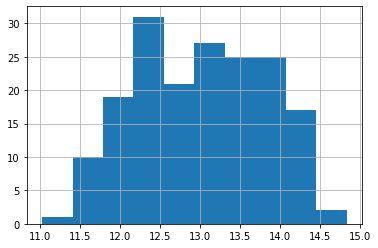

In [7]:
x=df.alcohol # objeto de tipo series
h=x.hist(bins=10)

In [10]:
type(x)

pandas.core.series.Series

In [11]:
x

0      14.23
1      13.20
2      13.16
3      14.37
4      13.24
       ...  
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: alcohol, Length: 178, dtype: float64

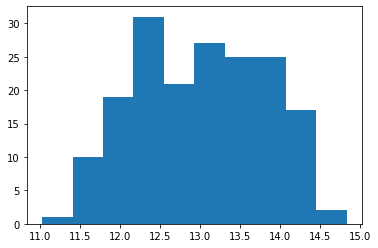

In [9]:
plt.hist(x);

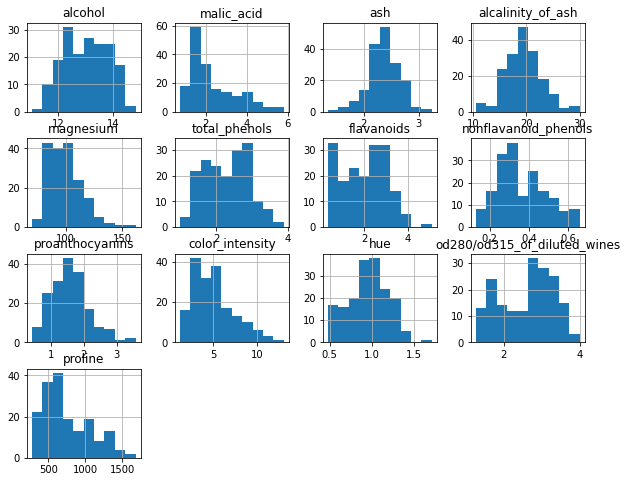

In [12]:
h=df.hist(figsize=(10,8))

# Medidas de posición o de tendencia central

In [13]:
#@title Media aritmética
x.mean()

13.000617977528083

In [14]:
np.mean(x)

13.000617977528083

In [16]:
s_mean = df.mean()
s_mean

alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
dtype: float64

In [17]:
s_mean['flavanoids']

2.0292696629213474

In [19]:
stats.tmean?

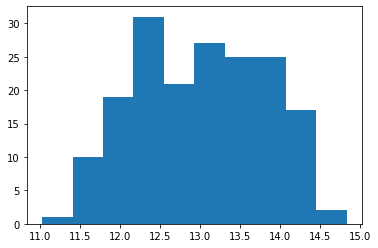

In [20]:
plt.hist(x);

In [18]:
#@title Media recortada
stats.tmean(x,(12,14))

12.983576642335766

In [21]:
stats.trim_mean(x,0.1)

13.006388888888889

$X=\{x1 \leq x2 \leq ... \leq xn\}$

$p$ porcentaje que se desea recortar 

$N$ número de elementos totales del conjunto de datos

$r = floor(n*p/100)$ 1.2 --> 1, 2.6 ---> 2

$Xtrim = \{x_{1+r},..,x_{n-r}\}$

In [22]:
x2 = np.array([1.3,1.5,2.0,4.7,8.9,10,11.5])
x2

array([ 1.3,  1.5,  2. ,  4.7,  8.9, 10. , 11.5])

In [23]:
# p 5% de los datos
stats.trim_mean(x2,0.05), x2.mean()

(5.7, 5.7)

In [24]:
# p 15%
stats.trim_mean(x2,0.15), x2.mean()

(5.42, 5.7)

In [25]:
#@title Media ponderada
np.average(x)

13.00061797752809

In [26]:
x.shape

(178,)

In [27]:
w=np.ones(x.shape)
w[0]=2              # A la primera observación le estamos dando el doble de importancia

In [28]:
x[0]

14.23

In [29]:
np.average(x,weights=w) # Media ponderada

13.007486033519553

In [30]:
rc = np.array([100, 155, 135, 160, 165]) #Reclamaciones anuales en 5 años de una compañia
rcp = np.array([155/100, 135/155, 160/135, 165/160])

In [31]:
rcp

array([1.55      , 0.87096774, 1.18518519, 1.03125   ])

In [32]:
#¿cuál es el incremento promedio interanual de reclamaciones?
stats.gmean(rcp)

1.133368103427352

In [33]:
#@title Media geométrica
stats.gmean(x)

12.975278352602606

In [34]:
#@title Media armónica   
stats.hmean(x)

12.949820740397149

In [35]:
# Ejemplo.
#pista de 2km
# persona que le da 5 vueltas, esta persona corre 10km 
# 1er vuelta ----> 12km/hr
# 2er vuelta ----> 17km/hr
# 3er vuelta ----> 14km/hr
# 4er vuelta ----> 8km/hr
# 4ta vuelta ----> 5km/hr

(12+17+14+8+5)/5

11.2

In [ ]:
#v=12km/hr , d=2km, t=? ---> (2/12)*60
# 0.16hrs---> 10min

#t1 = 10
#t2 = 6.6
#t3 = 8.5
#t4 = 15
#t5 = 24

#T=64.1minutos ----> 1.07hrs

#5 vueltas de 2km = 10km
# 10/1.07 = 9.4km/hr

# mh = 5/(1/12 + 1/17 +1/14 + 1/8 + 1/5)


In [36]:
#@title Moda
x.mode()

0    12.37
1    13.05
Name: alcohol, dtype: float64

In [37]:
mo=stats.mode(x)
mo

ModeResult(mode=array([12.37]), count=array([6]))

In [38]:
mo[0]

array([12.37])

In [39]:
mo[1]

array([6])

In [40]:
#@title Mediana
x.median()

13.05

In [41]:
np.median(x)

13.05

In [42]:
#@title Cuantiles o percentiles
x.quantile(0.25) # Primer cuartíl

12.362499999999999

In [43]:
x.quantile(0.1) # Primer decíl

11.933

In [44]:
np.quantile(x,0.25)

12.362499999999999

In [45]:
np.quantile(x,[0.25,0.5,0.75]) # Primero, segundo y tercer cuartíl

array([12.3625, 13.05  , 13.6775])

In [ ]:
#[1,3,4,7,8,8,9]

In [ ]:
#[1,3,4]

In [46]:
x.quantile([0.25,0.5,0.75])

0.25    12.3625
0.50    13.0500
0.75    13.6775
Name: alcohol, dtype: float64

In [47]:
_[0.25] # '_'  ->  último elemento mostrado

12.362499999999999

In [48]:
np.percentile(x,25) # Primer cuartíl

12.362499999999999

In [ ]:
#IQR = tercer cuartil - primer cuartil

# Medidas de disperción

In [49]:
#@title Varianza y desviación estandar
df.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0


In [50]:
x.var() # Varianza muestral

0.6590623278105763

In [51]:
x.std() # Desviación estandar muestral

0.8118265380058577

In [52]:
df.std()

alcohol                           0.811827
malic_acid                        1.117146
ash                               0.274344
alcalinity_of_ash                 3.339564
magnesium                        14.282484
total_phenols                     0.625851
flavanoids                        0.998859
nonflavanoid_phenols              0.124453
proanthocyanins                   0.572359
color_intensity                   2.318286
hue                               0.228572
od280/od315_of_diluted_wines      0.709990
proline                         314.907474
dtype: float64

In [53]:
np.var(x) # Varianza del conjunto completo

0.6553597304633259

In [54]:
np.std(x) # Std del conjunto completo

0.809542914528517

In [55]:
x.var(ddof=0) # Varianza del conjunto completo

0.6553597304633259

In [56]:
x.var?

In [57]:
x.std(ddof=0) # Std del conjunto completo

0.809542914528517

In [58]:
#@title Rango
x.max()-x.min() # Desde Pandas

3.8000000000000007

In [59]:
np.max(x)-np.min(x) # Desde Numpy

3.8000000000000007

In [60]:
max(x)-min(x) # 

3.8000000000000007

In [61]:
np.ptp(x)

3.8000000000000007

In [62]:
df.max()-df.min()

alcohol                            3.80
malic_acid                         5.06
ash                                1.87
alcalinity_of_ash                 19.40
magnesium                         92.00
total_phenols                      2.90
flavanoids                         4.74
nonflavanoid_phenols               0.53
proanthocyanins                    3.17
color_intensity                   11.72
hue                                1.23
od280/od315_of_diluted_wines       2.73
proline                         1402.00
dtype: float64

In [63]:
np.max(df,axis=0)-np.min(df,axis=0)

alcohol                            3.80
malic_acid                         5.06
ash                                1.87
alcalinity_of_ash                 19.40
magnesium                         92.00
total_phenols                      2.90
flavanoids                         4.74
nonflavanoid_phenols               0.53
proanthocyanins                    3.17
color_intensity                   11.72
hue                                1.23
od280/od315_of_diluted_wines       2.73
proline                         1402.00
dtype: float64

In [64]:
max(df)

'total_phenols'

In [65]:
stats.iqr(x,rng=(0,100))

3.8000000000000007

In [66]:
#@title Rango intercuartílico
stats.iqr(x)

1.3150000000000013

In [67]:
q1,q3=np.quantile(x,(0.25,0.75))
q1,q3

(12.362499999999999, 13.6775)

In [68]:
q3-q1

1.3150000000000013

In [69]:
q1,q3=x.quantile([0.25,0.75])

In [70]:
q1,q3

(12.362499999999999, 13.6775)

In [71]:
#@title Cueficiente de variación de Pearson
stats.variation(x)

0.062269571794804905

In [72]:
stats.variation(df)

array([0.06226957, 0.47681402, 0.11560124, 0.17082223, 0.14279209,
       0.27192157, 0.4908411 , 0.34296507, 0.35875872, 0.45704302,
       0.23805811, 0.27108673, 0.42043713])

In [73]:
df.std(ddof=0)

alcohol                           0.809543
malic_acid                        1.114004
ash                               0.273572
alcalinity_of_ash                 3.330170
magnesium                        14.242308
total_phenols                     0.624091
flavanoids                        0.996049
nonflavanoid_phenols              0.124103
proanthocyanins                   0.570749
color_intensity                   2.311765
hue                               0.227929
od280/od315_of_diluted_wines      0.707993
proline                         314.021657
dtype: float64

In [74]:
x.std(ddof=0)/np.abs(x.mean())

0.062269571794804954

# Medidas de forma

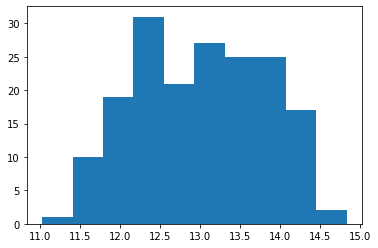

In [76]:
plt.hist(x);

In [75]:
#@title Coeficiente de Fisher (Simetría/Sesgo)
x.skew()

-0.051482331077134784

> Afisher >0 : Asimetría positiva (cargado a la izq)

> Afisher <0 : Asimetría negativa (cargado a la derecha)

> Afisher = 0 : simétrica

<AxesSubplot:>

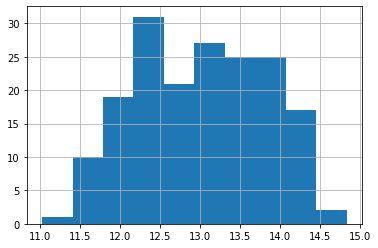

In [77]:
x.hist()

In [78]:
df.skew()

alcohol                        -0.051482
malic_acid                      1.039651
ash                            -0.176699
alcalinity_of_ash               0.213047
magnesium                       1.098191
total_phenols                   0.086639
flavanoids                      0.025344
nonflavanoid_phenols            0.450151
proanthocyanins                 0.517137
color_intensity                 0.868585
hue                             0.021091
od280/od315_of_diluted_wines   -0.307285
proline                         0.767822
dtype: float64

<AxesSubplot:>

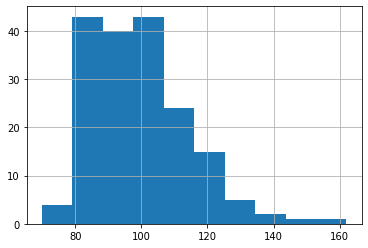

In [79]:
df['magnesium'].hist()

<AxesSubplot:>

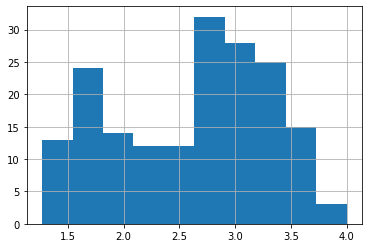

In [80]:
df['od280/od315_of_diluted_wines'].hist()

In [81]:
#@title Apuntamiento o Curtósis
x.kurt()

-0.8524995684849164

In [82]:
df.kurt()

alcohol                        -0.852500
malic_acid                      0.299207
ash                             1.143978
alcalinity_of_ash               0.487942
magnesium                       2.104991
total_phenols                  -0.835627
flavanoids                     -0.880382
nonflavanoid_phenols           -0.637191
proanthocyanins                 0.554649
color_intensity                 0.381522
hue                            -0.344096
od280/od315_of_diluted_wines   -1.086435
proline                        -0.248403
dtype: float64